In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("C:/Users/user/Downloads/Salary_Data.csv")

In [3]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

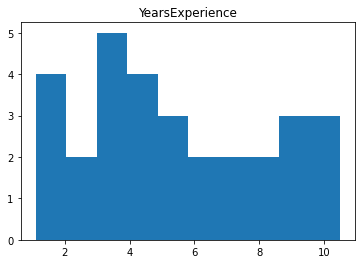

In [4]:
dataset.describe()
plt.hist(dataset['YearsExperience'])
plt.title('YearsExperience')
plt.show()

In [5]:
X=dataset[['Salary']]

In [6]:
Y=dataset[['YearsExperience']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=42)

In [8]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (1,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [10]:
N_EPOCHS = 70
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/70
1/1 [==============================] - 1s 613ms/step - loss: 164199440.0000 - mse: 164199440.0000 - val_loss: 183203744.0000 - val_mse: 183203744.0000
Epoch 2/70
1/1 [==============================] - 0s 21ms/step - loss: 115063424.0000 - mse: 115063424.0000 - val_loss: 140106528.0000 - val_mse: 140106528.0000
Epoch 3/70
1/1 [==============================] - 0s 21ms/step - loss: 87996264.0000 - mse: 87996264.0000 - val_loss: 110481352.0000 - val_mse: 110481352.0000
Epoch 4/70
1/1 [==============================] - 0s 21ms/step - loss: 69390152.0000 - mse: 69390152.0000 - val_loss: 88325104.0000 - val_mse: 88325104.0000
Epoch 5/70
1/1 [==============================] - 0s 20ms/step - loss: 55474844.0000 - mse: 55474844.0000 - val_loss: 71023232.0000 - val_mse: 71023232.0000
Epoch 6/70
1/1 [==============================] - 0s 26ms/step - loss: 44608332.0000 - mse: 44608332.0000 - val_loss: 57174720.0000 - val_mse: 57174720.0000
Epoch 7/70
1/1 [==============================]

1/1 [==============================] - 0s 22ms/step - loss: 0.9158 - mse: 0.9158 - val_loss: 0.9116 - val_mse: 0.9116
Epoch 59/70
1/1 [==============================] - 0s 21ms/step - loss: 0.9158 - mse: 0.9158 - val_loss: 0.9116 - val_mse: 0.9116
Epoch 60/70
1/1 [==============================] - 0s 21ms/step - loss: 0.9160 - mse: 0.9160 - val_loss: 0.9116 - val_mse: 0.9116
Epoch 61/70
1/1 [==============================] - 0s 22ms/step - loss: 0.9160 - mse: 0.9160 - val_loss: 0.9116 - val_mse: 0.9116
Epoch 62/70
1/1 [==============================] - 0s 20ms/step - loss: 0.9160 - mse: 0.9160 - val_loss: 0.9113 - val_mse: 0.9113
Epoch 63/70
1/1 [==============================] - 0s 20ms/step - loss: 0.9162 - mse: 0.9162 - val_loss: 0.9113 - val_mse: 0.9113
Epoch 64/70
1/1 [==============================] - 0s 21ms/step - loss: 0.9162 - mse: 0.9162 - val_loss: 0.9113 - val_mse: 0.9113
Epoch 65/70
1/1 [==============================] - 0s 22ms/step - loss: 0.9162 - mse: 0.9162 - val_los

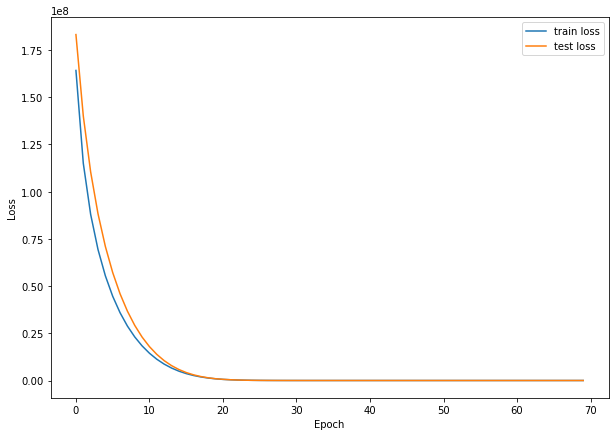

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

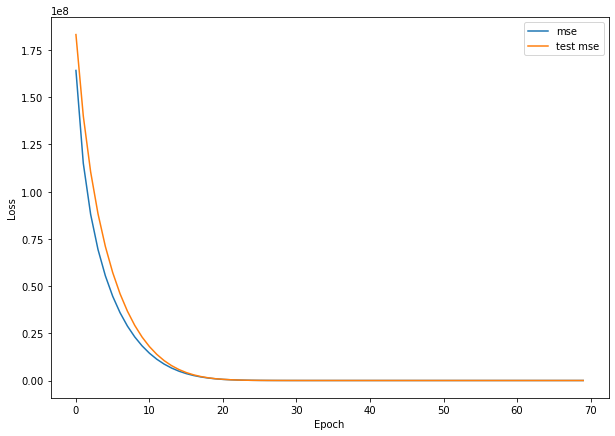

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
test_mse_score, test_mae_score=model.evaluate(X_test, y_test)


1/1 [==============================] - 0s 20ms/step - loss: 0.9110 - mse: 0.9110
